We used https://fred.stlouisfed.org/ to download Canada's economic data that might play a role in Real Estate trends, price levels etc...
One can also use https://tradingeconomics.com/canada/interest-rate.

In the folder "Canadian Economy Data", you will find csv containing monthly data about unemployment, Central Bank real interest rates, CPI(inflation), 
M1 money supply, CAD-USD exchange rates.

The goal is to develop a correlation matrix for between all data to help us in our featurs selection for the Machine Learning model I plan to make.
Correlation as a statistical measure indicates the strength by which to two variables move together. Correlation can be positive/direct, negative/inverse or near 0, high correlation 
values -between a dependent variable and an independent variable- are of high significance in determining the output, finding high correlations between input and output values helps for in building more accurate and faster ML model. We must keep in mind that more features does not mean better accuracy, we shall avoid overfitting.

We use Pearson Correlation coefficient -r- to measure how strong is the correlation in each pair of continiuous variables in our merged dataframe -hpi_and_economydata_df-.
All data in each column are scaled and continuous, the samples of each variables are independent of each other and from reputable sources: statscan(Canadian Government) and 
stlouisfed.org. The correlation is calculated by dividing the covariance fo two variables by the product of their respective standard deviations.

Correlation, r, ranges from -1 to 1 and is interpreted as follows:
_the closer to 1, the stronger the correlation between two variables 
    _the close to 0, the weaker the correlation 
        _ r >= 0.75 is considered as a strong correlation and r <= -0.75 is considered as strong negative correlation (https://statisticsbyjim.com/basics/correlations/; 
        https://www.statology.org/what-is-a-strong-correlation/)


In [2]:
import pandas as pd

In [3]:
cities_hpi_df = pd.read_csv(r"C:\Users\hp\Desktop\Projects Coding\Affinity_Propagation_Canada_Real_Estate_Market\Processed Data\cities_hpi_df.csv")

#Dropping Province HPI columns given the obvious correlation with the cities of the same provinces
cities_hpi_df = cities_hpi_df.drop(columns=["Unnamed: 0", "HPI_atlantic", "HPI_prairie_region"], axis = 1)

#If we don't want to maintain NAN values in our dataframe, hpi_df, many columns start from the top with NAN values let's check at which index the first float value is shown.
#We can find first index with float value by   hpu_df["HPI_sherbrooke_qc"].first_valid_index()
#Preview
cities_hpi_df.head()

,REF_DATE,HPI_nfland_labrador,HPI_charlottetown_pei,HPI_halifax_ns,HPI_stjohn_fredericton_moncton,HPI_quebec_qc,HPI_sherbrooke_qc,HPI_troisriv_qc,HPI_mtl_qc,HPI_ottawa_gatineau_qc,...,HPI_guelph_ont,HPI_london_ont,HPI_windsor_ont,HPI_sudbury_ont,HPI_winnipeg_manitoba,HPI_edmonton_alb,HPI_calgary_alb,HPI_victoria_bc,HPI_vancouver_bc,HPI_kelowna_bc
0,1981-01,37.5,NaN,NaN,61.4,34.9,NaN,NaN,30.0,NaN,...,NaN,27.0,64.9,54.6,29.3,36.5,27.8,206.8,96.1,NaN
1,1981-02,37.5,NaN,NaN,62.1,35.4,NaN,NaN,30.2,NaN,...,NaN,27.5,64.9,55.6,29.7,36.8,28.1,209.1,97.5,NaN
2,1981-03,37.5,NaN,NaN,62.1,35.4,NaN,NaN,30.5,NaN,...,NaN,28.2,64.1,55.6,30.3,36.8,28.6,210.6,97.5,NaN
3,1981-04,37.5,NaN,NaN,62.1,35.7,NaN,NaN,30.8,NaN,...,NaN,28.6,63.9,57.0,30.5,36.9,30.1,210.6,97.7,NaN
4,1981-05,37.7,NaN,NaN,63.3,36.1,NaN,NaN,31.1,NaN,...,NaN,28.6,63.9,57.0,31.1,38.2,30.1,212.4,97.7,NaN


In [4]:
#Unemployment dataframe
#We will drop all rows up to 1981-01-01

unemployment_df = pd.read_csv(r"C:\Users\hp\Desktop\Projects Coding\Affinity_Propagation_Canada_Real_Estate_Market\Canadian Economy Data\unemployment_LRUN64TTCAM156S.csv")
#
unemployment_df = unemployment_df.loc[(unemployment_df['DATE'] >= '1981-01-01' )]

#Renaming column for readable dataframe 
unemployment_df = unemployment_df.rename(columns={unemployment_df.columns[1]: 'unemployment_rate'})

#Renaming the date column to fit the date column in cities_hpi_df.
unemployment_df.rename(columns={'DATE':'REF_DATE'}, inplace = True)

#Let adjust the dataframe's DATE format to fit the YEAR-MONTH format in REF_DATE column in hp_df 
from datetime import datetime
unemployment_df['REF_DATE'] = pd.to_datetime(unemployment_df['REF_DATE']).dt.strftime('%Y-%m')    

#Resetting index without reassigning 
unemployment_df.reset_index(drop = True, inplace = True)
#Displaying dataframe with filtered date
unemployment_df.head()

,REF_DATE,unemployment_rate
0,1981-01,7.4
1,1981-02,7.4
2,1981-03,7.3
3,1981-04,7.1
4,1981-05,7.2


In [5]:
#CPI Consumer Price Index All Items Dataframe
#We will drop all rows up to 1981-01-01
consumer_price_index_df = pd.read_csv(r"C:\Users\hp\Desktop\Projects Coding\Affinity_Propagation_Canada_Real_Estate_Market\Canadian Economy Data\consumer_price_index_all_items_Canada_CPALTT01CAM659N.csv")

consumer_price_index_df = consumer_price_index_df.loc[(consumer_price_index_df['DATE'] >= '1981-01-01' )]

#Renaming column for readable dataframe 
consumer_price_index_df = consumer_price_index_df.rename(columns={consumer_price_index_df.columns[1]: 'CPI_inflation'})

#Renaming the date column to fit the date column in cities_hpi_df.
consumer_price_index_df.rename(columns={'DATE':'REF_DATE'}, inplace = True)

#Let adjust the dataframe's DATE format to fit the YEAR-MONTH format in REF_DATE column in hp_df 
consumer_price_index_df['REF_DATE'] = pd.to_datetime(consumer_price_index_df['REF_DATE']).dt.strftime('%Y-%m') 

#Resetting index without reassigning 
consumer_price_index_df.reset_index(drop = True, inplace = True)
#Displaying dataframe with filtered date
consumer_price_index_df.head()

,REF_DATE,CPI_inflation
0,1981-01,12.200957
1,1981-02,12.056738
2,1981-03,12.676056
3,1981-04,12.587413
4,1981-05,12.211982


In [6]:
#CAD-USD Rate dataframe
#We will drop all rows up to 1981-01-01
cadusd_rate_df = pd.read_csv(r"C:\Users\hp\Desktop\Projects Coding\Affinity_Propagation_Canada_Real_Estate_Market\Canadian Economy Data\cad_usd_Spot_Rate.csv")

cadusd_rate_df = cadusd_rate_df.loc[(cadusd_rate_df['DATE'] >= '1981-01-01' )]

#Renaming column for readable dataframe 
cadusd_rate_df = cadusd_rate_df.rename(columns={cadusd_rate_df.columns[1]: 'CAD-USD'})

#Renaming the date column to fit the date column in cities_hpi_df.
cadusd_rate_df.rename(columns={'DATE':'REF_DATE'}, inplace = True)

#Let adjust the dataframe's DATE format to fit the YEAR-MONTH format in REF_DATE column in hp_df 
cadusd_rate_df['REF_DATE'] = pd.to_datetime(cadusd_rate_df['REF_DATE']).dt.strftime('%Y-%m') 

#Resetting index without reassigning 
cadusd_rate_df.reset_index(drop = True, inplace = True)
#Displaying dataframe with filtered date
cadusd_rate_df.head()

,REF_DATE,CAD-USD
0,1981-01,1.1909
1,1981-02,1.1984
2,1981-03,1.1914
3,1981-04,1.1910
4,1981-05,1.2010


In [7]:
#Interest Rate Central Bank dataframe
#We will drop all rows up to 1981-01-01
central_bank_interest_rate_df = pd.read_csv(r"C:\Users\hp\Desktop\Projects Coding\Affinity_Propagation_Canada_Real_Estate_Market\Canadian Economy Data\interest_rate_Central_Bank_CanadaIRSTCB01CAM156N.csv")

central_bank_interest_rate_df = central_bank_interest_rate_df.loc[(central_bank_interest_rate_df['DATE'] >= '1981-01-01' )]

#Renaming column for readable dataframe 
central_bank_interest_rate_df = central_bank_interest_rate_df.rename(columns={central_bank_interest_rate_df.columns[1]: 'Interest_Rate_Central_Bank'})

#Renaming the date column to fit the date column in cities_hpi_df.
central_bank_interest_rate_df.rename(columns={'DATE':'REF_DATE'}, inplace = True)

#Let adjust the dataframe's DATE format to fit the YEAR-MONTH format in REF_DATE column in hp_df 
central_bank_interest_rate_df['REF_DATE'] = pd.to_datetime(central_bank_interest_rate_df['REF_DATE']).dt.strftime('%Y-%m') 


#Resetting index without reassigning 
central_bank_interest_rate_df.reset_index(drop = True, inplace = True)
#Displaying dataframe with filtered date
central_bank_interest_rate_df.tail()

,REF_DATE,Interest_Rate_Central_Bank
495,2022-04,1.25
496,2022-05,1.25
497,2022-06,1.75
498,2022-07,2.75
499,2022-08,2.75


In [8]:
"""With the economical dataframes ready, central_bank_interest_rate_df, cadusd_rate_df, consumer_price_index_df and unemployment_rate_df, let's merge their data 
on DATE column with cities_hpi_df before our Correlation Matrix!"""

from functools import reduce

dataframes2 = [cities_hpi_df, central_bank_interest_rate_df, cadusd_rate_df, consumer_price_index_df, unemployment_df]

#Merging dataframes on REF_DATE
hpi_and_economydata_df = reduce(lambda left, right: pd.merge(left, right, on = 'REF_DATE'), dataframes2)

#Saving dataframe as csv
hpi_and_economydata_df.to_csv(r"C:\Users\hp\Desktop\Projects Coding\Affinity_Propagation_Canada_Real_Estate_Market\Processed Data\hpi_and_economydata_df.csv")

#Previewing
hpi_and_economydata_df.tail()

,REF_DATE,HPI_nfland_labrador,HPI_charlottetown_pei,HPI_halifax_ns,HPI_stjohn_fredericton_moncton,HPI_quebec_qc,HPI_sherbrooke_qc,HPI_troisriv_qc,HPI_mtl_qc,HPI_ottawa_gatineau_qc,...,HPI_winnipeg_manitoba,HPI_edmonton_alb,HPI_calgary_alb,HPI_victoria_bc,HPI_vancouver_bc,HPI_kelowna_bc,Interest_Rate_Central_Bank,CAD-USD,CPI_inflation,unemployment_rate
494,2022-03,106.7,125.5,123.9,119.1,131.3,112.4,112.6,160.0,120.1,...,155.0,111.3,128.3,132.1,127.0,126.3,0.75,1.2660,6.661891,5.2
495,2022-04,106.7,125.5,123.9,121.1,131.3,113.1,112.6,159.2,120.1,...,156.9,112.0,131.1,132.1,127.2,126.3,1.25,1.2628,6.771205,5.1
496,2022-05,106.7,125.5,127.5,121.1,132.6,113.1,112.6,161.1,120.5,...,158.6,113.5,133.4,132.1,127.2,128.3,1.25,1.2859,7.730496,5.0
497,2022-06,107.4,126.9,127.5,121.1,133.3,113.1,112.6,160.9,120.5,...,158.6,113.6,133.6,132.1,127.2,128.3,1.75,1.2804,8.132956,5.1
498,2022-07,107.4,127.3,127.5,121.1,133.3,113.1,112.6,160.6,120.5,...,158.6,113.2,133.2,132.1,127.6,128.4,2.75,1.2936,7.589599,5.0


In [9]:
import numpy as np 
import seaborn as sns

from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters

# import matplotlib.dates as mdates
# import requests
# import json

In [10]:
# list_length = hpi_and_economydata_df.shape[1]
ncols = 10
# nrows = int(round(list_length / ncols, 0))
# height = list_length / 3 if list_length > 30 else 16

# fig, axs = plt.subplots(nrows = nrows, ncols = ncols, sharex = True, sharey = True, figsize=(20, height))

# for i, ax in enumerate(fig.axes):
#     if i < list_length:
#         sns.lineplot(data = hpi_and_economydata_df, x = hpi_and_economydata_df.index, y = hpi_and_economydata_df.iloc[:, i], ax = ax)
#         ax.set_title(hpi_and_economydata_df.columns[i])
#         ax.tick_params(labelrotation = 45)

# plt.show()

In [11]:
#Diagonal Matrix

sns.set(style = "white")

#Column titles
col_list = hpi_and_economydata_df.columns


# #Matrix correlation
df = pd.DataFrame(hpi_and_economydata_df, columns = col_list)
corr = hpi_and_economydata_df.corr()
corr

,HPI_nfland_labrador,HPI_charlottetown_pei,HPI_halifax_ns,HPI_stjohn_fredericton_moncton,HPI_quebec_qc,HPI_sherbrooke_qc,HPI_troisriv_qc,HPI_mtl_qc,HPI_ottawa_gatineau_qc,HPI_ottawa_gatineau_ont,...,HPI_winnipeg_manitoba,HPI_edmonton_alb,HPI_calgary_alb,HPI_victoria_bc,HPI_vancouver_bc,HPI_kelowna_bc,Interest_Rate_Central_Bank,CAD-USD,CPI_inflation,unemployment_rate
HPI_nfland_labrador,1.000000,0.809178,0.967365,0.913697,0.956336,0.726469,0.814820,0.939378,0.750806,0.908960,...,0.952084,0.943596,0.956058,-0.745164,0.700836,0.881786,-0.794187,-0.401540,-0.423126,-0.551424
HPI_charlottetown_pei,0.809178,1.000000,0.915595,0.938158,0.931131,0.857638,0.949985,0.960976,0.934678,0.962205,...,0.921530,0.810671,0.865987,-0.083705,0.876443,0.985258,-0.648842,-0.516239,0.360684,-0.376807
HPI_halifax_ns,0.967365,0.915595,1.000000,0.944111,0.983846,0.875349,0.975187,0.984877,0.963947,0.966878,...,0.985872,0.938498,0.970069,-0.717476,0.708448,0.982344,-0.817482,-0.353502,-0.251645,-0.600490
HPI_stjohn_fredericton_moncton,0.913697,0.938158,0.944111,1.000000,0.958409,0.926793,0.929422,0.950196,0.906686,0.916849,...,0.919981,0.865024,0.879345,-0.686297,0.783282,0.983606,-0.783221,-0.335532,-0.512909,-0.553292
HPI_quebec_qc,0.956336,0.931131,0.983846,0.958409,1.000000,0.880470,0.925072,0.982006,0.891594,0.954799,...,0.956141,0.944951,0.954882,-0.767053,0.696730,0.979131,-0.841574,-0.342966,-0.483681,-0.637307
HPI_sherbrooke_qc,0.726469,0.857638,0.875349,0.926793,0.880470,1.000000,0.889817,0.926950,0.873268,0.912617,...,0.917285,0.726256,0.806465,0.871656,0.801522,0.887305,-0.161513,-0.227068,0.759187,-0.017448
HPI_troisriv_qc,0.814820,0.949985,0.975187,0.929422,0.925072,0.889817,1.000000,0.972529,0.987701,0.984348,...,0.901227,0.639435,0.697039,0.907705,0.862496,0.939921,-0.400469,-0.441446,0.670023,0.059893
HPI_mtl_qc,0.939378,0.960976,0.984877,0.950196,0.982006,0.926950,0.972529,1.000000,0.965153,0.990113,...,0.982833,0.915208,0.944967,-0.708017,0.738674,0.979490,-0.792420,-0.289179,-0.394143,-0.606946
HPI_ottawa_gatineau_qc,0.750806,0.934678,0.963947,0.906686,0.891594,0.873268,0.987701,0.965153,1.000000,0.980687,...,0.870625,0.569565,0.636506,0.873307,0.829877,0.924931,-0.418068,-0.409189,0.615413,0.143311
HPI_ottawa_gatineau_ont,0.908960,0.962205,0.966878,0.916849,0.954799,0.912617,0.984348,0.990113,0.980687,1.000000,...,0.977155,0.880764,0.920384,-0.645759,0.732585,0.975206,-0.746985,-0.277999,-0.321030,-0.569082


C:\Users\hp\AppData\Local\Temp\ipykernel_7332\3028599167.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype = np.bool))


<AxesSubplot:>

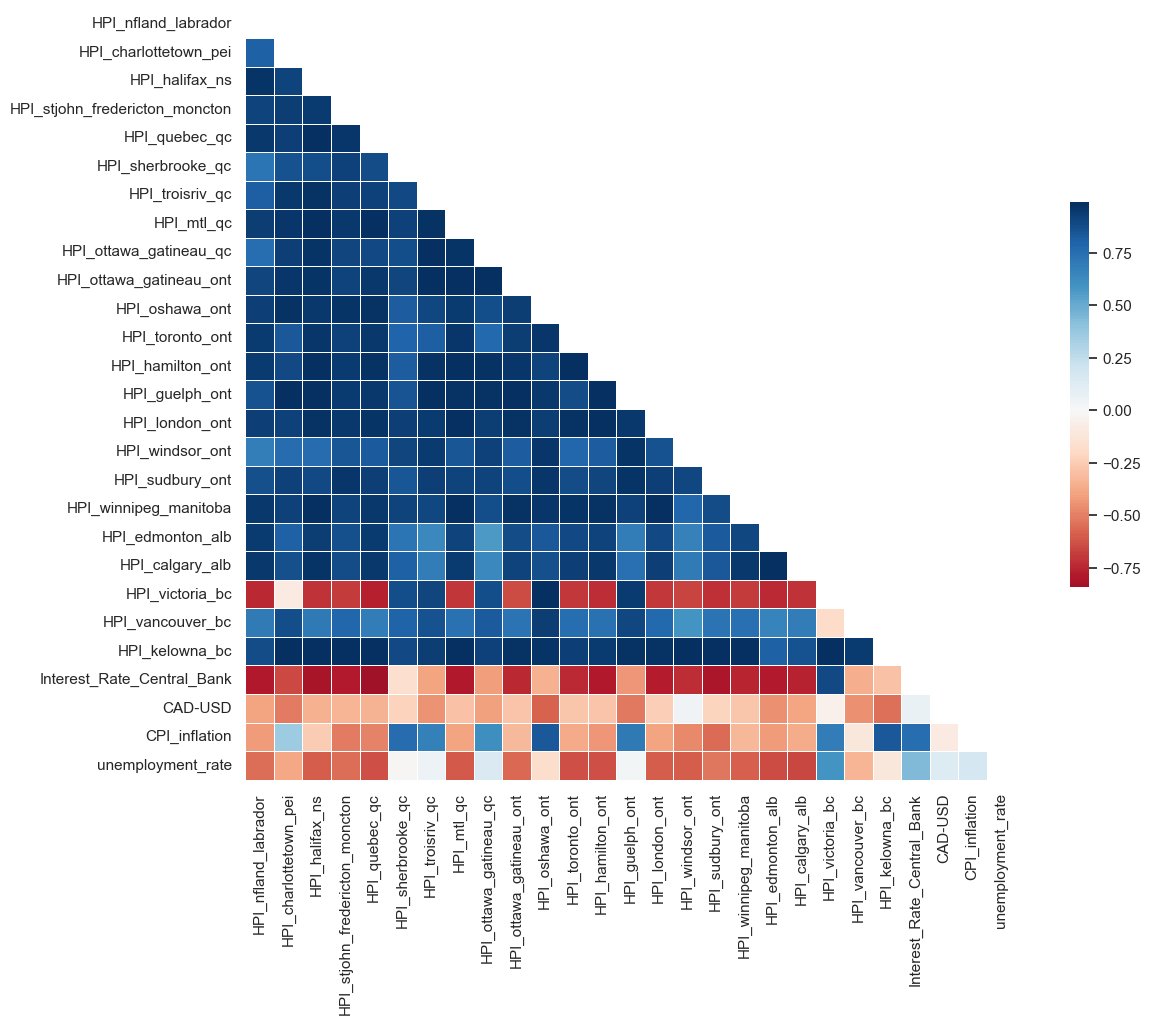

In [12]:
#Visualizing the Correlation Matrix with colors, HeatMap, showing the strength
mask = np.triu(np.ones_like(corr, dtype = np.bool))

f, ax = plt.subplots(figsize=(14,10))

#Heatmap colors
cmap = "RdBu"

sns.heatmap(
    corr,
    mask = mask,
    cmap = cmap,
    center = 0,
    square = True,
    linewidths = 0.5, 
    cbar_kws ={"shrink": 0.5},
)